
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

## <p style="text-align: center;"> Tianxin Huang (th29885); Rulan Pan (rp33973) </p>
Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

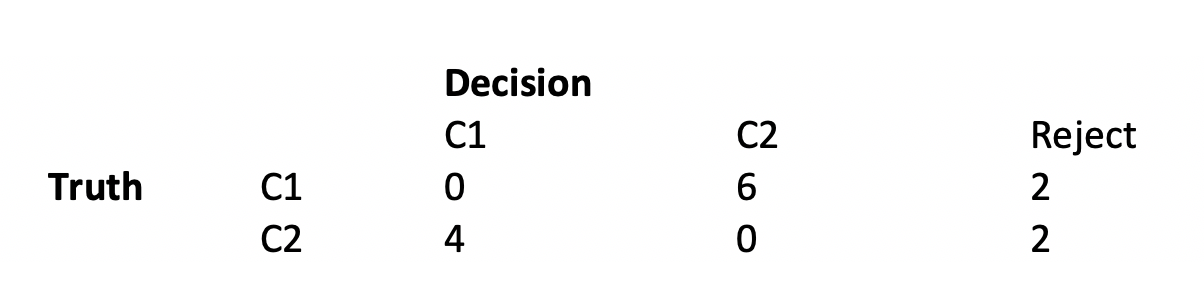

## Answer
loss of call "class1": $P(C1|x)*0+(1-P(C1|x))*4 = 4-4P(C1|x)$  (1)

loss of call "class2": $6P(C1|x)+(1-P(C1|x))*0 = 6P(C1|x)$  (2)

loss of rejection: $2P(C1|x)+(1-P(C1|x))*2 = 2$  (3)

(i) When it is best to call class1, (1)<(2) and (1)<(3)

P(C1|x)>1/2

(ii) When it is best to reject, (3)<(2) and (3)<(1)

1/3 <P(C1|x)< 1/2


# Question 2 - Concepts (15 pts)

1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart? How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)

ROC curve shows the track of (FP/N, TP/P) when we change threshold so that number of points we call positive will change. While lift charts shows the track of ((FP+TP)/Total, lift) when we change threshold so that number of points we call positive will change.

*Similarity*: They both describe how well the model performs campared with baseline classifier. Also, their criteria of a better model is to show more area over the baseline classifier.

*Difference*: Their ways of showing the comaprison with baseline classifier are different. The baseline in ROC is the 45 degree line, while in lift chart it is y=1. 

*Example*: When we focus on a group of points and want more accuracy from that group of points, it is better to use lift charts than AUROC. This is because lift charts may show the results from different parts of a training set, while AUROC can only show the model performance over the whole range of threshold. Lift charts will differentiate the two models with the same AUROC but different levels of accuracy in a specific group of points. 



2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

Calibrating a classifier means we want the score to be a good estimate of probability when labeling the data with a class. 
A classifier can produce a score to measure the probability of one class given an input. However, the score may not necessarily well represent the probability of the class. For example in Bayes decision rule, we may not have a good estimate of prior due to the limit of training data. In this case, a calibrated classifier is needed. 

Another example in real life: we want our model to generate the posteria probability of debt default and we compare the posteria with a defaut rate we get from other method. If the posteria is below the default rate, a loan is issued. In this case, we have to calibrate the model. 

In conclusion, although using a calibrated classifier is not a must when we use the same classifier to label data with classes, it is necessary when we are trying to get an accurate posteria probability.


# Question 3 - MNIST Classification (20 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Logistic Regression, Naive Bayes, and MLP. The code below loads the dataset, splits it into training and testing sets, and extracts the images containing either 8 or 9. The modules you will need from scikit-learn are loaded for you.


In [1]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original', data_home='dataset')  # data downloaded in'./dataset/', change if necessary

X= (mnist.data / 255.)
y = mnist.target

num_train = 60000
idxs_perm = np.random.permutation(X.shape[0])
idxs_train = idxs_perm[:num_train]
idxs_test = idxs_perm[num_train:]

In [2]:
X_train = X[idxs_train]
y_train = y[idxs_train]
X_test = X[idxs_test]
y_test = y[idxs_test]

In [3]:
digits = [8, 9]
idx = (y_train == digits[0]) + (y_train==digits[1])
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-digits[0])

idx = (y_test == digits[0]) + (y_test==digits[1])
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-digits[0])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(11880, 784) (11880,) (1903, 784) (1903,)



1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.


In [4]:
#Logistic Regression
lr = LogisticRegression()
lr_fit = lr.fit(X_train,y_train)
lr_y_pred = lr_fit.predict(X_test)
lr_y_prob = lr_fit.predict_proba(X_test)
lr_y_prob

array([[9.94858108e-01, 5.14189236e-03],
       [9.92550196e-01, 7.44980364e-03],
       [6.45506797e-03, 9.93544932e-01],
       ...,
       [9.99961398e-01, 3.86016758e-05],
       [9.99927571e-01, 7.24285319e-05],
       [3.17341942e-04, 9.99682658e-01]])

In [5]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb_fit=gnb.fit(X_train,y_train)
gnb_y_pred = gnb_fit.predict(X_test)
gnb_y_prob = gnb_fit.predict_proba(X_test)
gnb_y_prob

array([[3.38342891e-011, 1.00000000e+000],
       [2.71611154e-010, 1.00000000e+000],
       [4.00956193e-111, 1.00000000e+000],
       ...,
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 4.97270969e-160],
       [5.41002940e-118, 1.00000000e+000]])

In [6]:
#MLP Classifier
mlp = MLPClassifier()
mlp_fit = mlp.fit(X_train,y_train)
mlp_y_pred = mlp_fit.predict(X_test)
mlp_y_prob = mlp_fit.predict_proba(X_test)
mlp_y_prob

array([[9.99992174e-01, 7.82583208e-06],
       [9.99988007e-01, 1.19927257e-05],
       [2.45472330e-06, 9.99997545e-01],
       ...,
       [9.99999216e-01, 7.83640715e-07],
       [9.99998067e-01, 1.93348925e-06],
       [3.71249538e-07, 9.99999629e-01]])


2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)


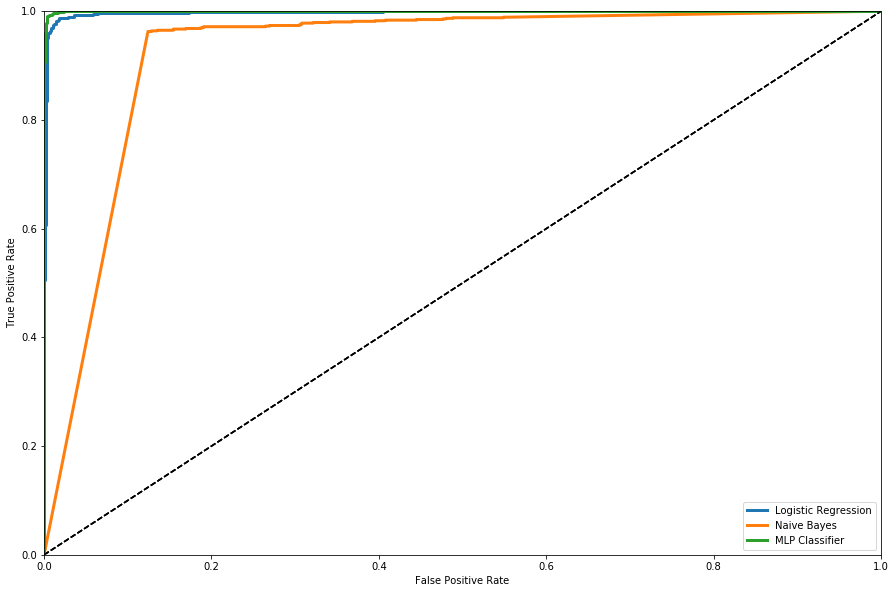

In [13]:
def plot_roc_curve(fpr, npr, label=None):
    plt.plot(fpr, tpr, linewidth=3, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plt.figure(figsize=(15,10))
fpr, tpr, thresholds = roc_curve(y_test, lr_y_prob[:, 1])
plot_roc_curve(fpr, tpr, 'Logistic Regression')   
fpr, tpr, thresholds = roc_curve(y_test, gnb_y_prob[:, 1])
plot_roc_curve(fpr, tpr, 'Naive Bayes')
fpr, tpr, thresholds = roc_curve(y_test, mlp_y_prob[:, 1])
plot_roc_curve(fpr, tpr, 'MLP Classifier')

plt.legend(loc=0)



3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.


In [16]:
from sklearn.metrics import confusion_matrix

auc_gnb = roc_auc_score(y_test, gnb_y_prob[:, 1])
print ('AUC for Naive Bayes:', str(auc_gnb))
tn, fp, fn, tp = confusion_matrix(y_test,gnb_y_pred).ravel()
print ('model accuracy for Naive Bayes:',round((tp+tn)/(tn+fp+fn+tp),4))

auc_lr = roc_auc_score(y_test, lr_y_prob[:, 1])
print ('AUC for Logistic Regression:', str(auc_lr))
tn, fp, fn, tp = confusion_matrix(y_test,lr_y_pred).ravel()
print ('model accuracy for Logistic Regression:',round((tp+tn)/(tn+fp+fn+tp),4))

auc_mlp = roc_auc_score(y_test, mlp_y_prob[:, 1])
print ('AUC for MLP Classifier:', str(auc_mlp))
tn, fp, fn, tp = confusion_matrix(y_test,mlp_y_pred).ravel()
print ('model accuracy for MLP Classifier:',round((tp+tn)/(tn+fp+fn+tp),4))

AUC for Naive Bayes: 0.9236671712075345
model accuracy for Naive Bayes: 0.8986
AUC for Logistic Regression: 0.9973113282702214
model accuracy for Logistic Regression: 0.9837
AUC for MLP Classifier: 0.9997543682617239
model accuracy for MLP Classifier: 0.9926



4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 


Text(0.5,0,'Naive Bayes posterior probability')

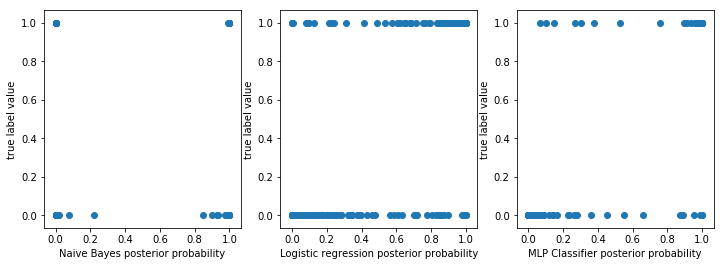

In [25]:
plt.rcParams['figure.figsize'] = (12.0, 4.0)

plt.subplot(1,3,2)
plt.scatter(lr_y_prob[:,1],y_test,label = 'Logestic regression')
plt.ylabel('true label value')
plt.xlabel('Logistic regression posterior probability')


plt.subplot(1,3,3)
plt.scatter(mlp_y_prob[:,1],y_test,label = 'MLPClassifier')
plt.ylabel('true label value')
plt.xlabel('MLP Classifier posterior probability')


plt.subplot(1,3,1)
plt.scatter(gnb_y_prob[:,1],y_test,label = '(Gaussian) Naive Bayes')
plt.ylabel('true label value')
plt.xlabel('Naive Bayes posterior probability')

5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

The distribution of the Naive Bayes estimated posterior probability values tend to be more polarized in the 4 corners of the graph. The points in the bottom left and upper right corners are the TPs and TNs, showing the exactly correct predictions; the points in the bottom right and upper left corners are the FPs and FNs.